In [1]:
## Libraries that needs to run the script ##
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import TPR, XTC
from MDAnalysis.analysis import density
import numpy as np
import matplotlib.pyplot as plt
import nglview as nv
%matplotlib inline

In [2]:
## read the trajectory files ##
u = mda.Universe("../../wave/next.tpr", "../../wave/second.xtc")
from MDAnalysis import transformations as trans
CL = u.select_atoms('resname TLCL2')
LIPID= u.select_atoms('resname TLCL2 or resname POPE or resname POPC or resname DYPC or resname PLPI or resname SLPS') 
water = u.select_atoms('resname TIP3')
Ions = u.select_atoms('resname POT')
workflow = [ trans.center_in_box(LIPID, # move atoms so protein
                                center='geometry'), # is centered
           ]
u.trajectory.add_transformations(*workflow)

In [3]:
## create the density profile for CL ##
P = u.select_atoms('resname TLCL2 and name C3')
dens = density.DensityAnalysis(P,
                               delta=4.0,
                               padding=2)
dens.run()

In [8]:
import numpy as np

# ensure that the density is A^{-3}
dens.density.convert_density("nm^{-3}")

In [9]:
grid = dens.density.grid
grid.shape

(56, 23, 43)

In [10]:
mx, my, mz = dens.density.midpoints

In [11]:
grid = dens.density.grid
flat = grid.ravel() / (grid.max()*10)

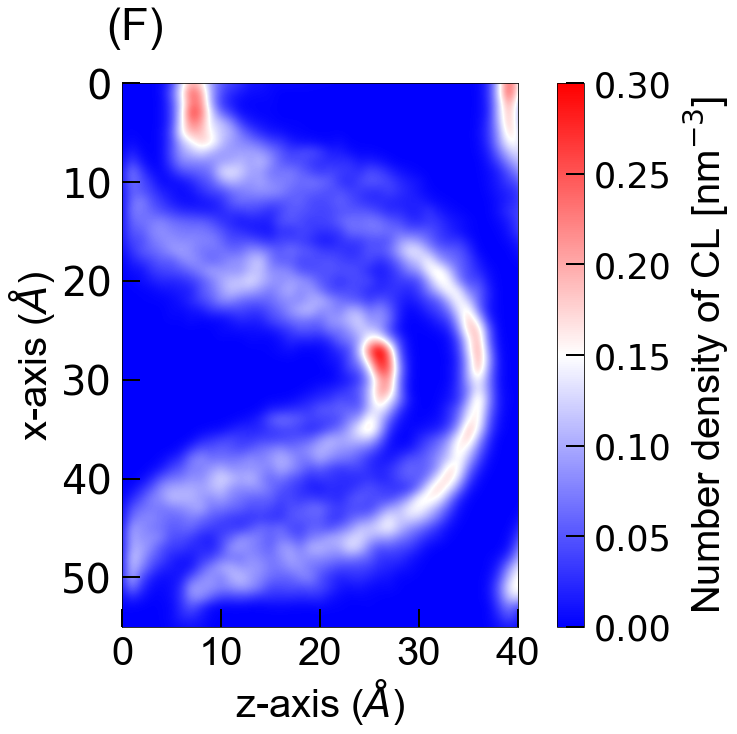

In [13]:
## Graph plot ##
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
#ax = fig.add_subplot(111)
#cbax=fig.add_axes
avg = grid.mean(axis=1)
avg.shape
#fig, ax = plt.subplots()
im = ax.imshow(avg, interpolation='bicubic', alpha=1, vmax=0.30, vmin=0, cmap="bwr")
cbar = plt.colorbar(im)
cbar.set_label('Number density of CL [nm$^{-3}$]',fontsize=40, fontname='arial', labelpad=10)
#cbar.set_ticklabels()
plt.xlabel('z-axis ($\AA$)', fontsize=40, fontname='arial')
plt.ylabel('x-axis ($\AA$)', fontsize=40, fontname='arial')
plt.ylim(55,0,10)
plt.xlim(0,40,2)
plt.xticks(np.arange(0, 40.001, 10 ), fontsize=40, fontname='arial')
cbar.ax.tick_params(labelsize=35, direction='in', length=18, bottom='bool', width=2, pad=10)
plt.tick_params(axis='both', which='major', labelsize=40, direction='in', length=18, bottom='bool', width=2, pad=10)
plt.title("(F)", loc = 'left', y=1.07, x=-0.04, fontsize=45, fontname='arial')
#im.show()
fig.savefig('Figure8F.jpg', bbox_inches='tight', dpi=500)